<a href="https://colab.research.google.com/github/Y07-assine/Sea-Level-Predictor/blob/main/sea_level_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the packages



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

Import the data

In [2]:
df = pd.read_csv('/content/epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [3]:
df.shape

(134, 5)

In [4]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix

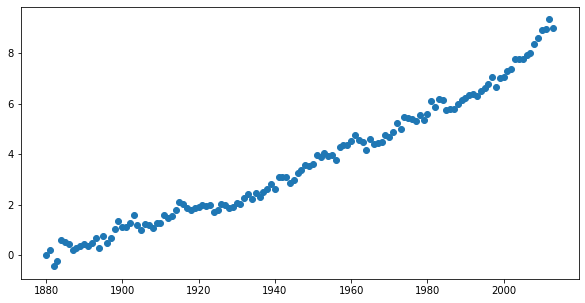

In [48]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(df['Year'],df['CSIRO Adjusted Sea Level'])

Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit

In [49]:
res = linregress(df['Year'],df['CSIRO Adjusted Sea Level'])
x_pred = pd.Series(i for i in range(1880,2051))
y_pred = res.slope*x_pred + res.intercept

Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

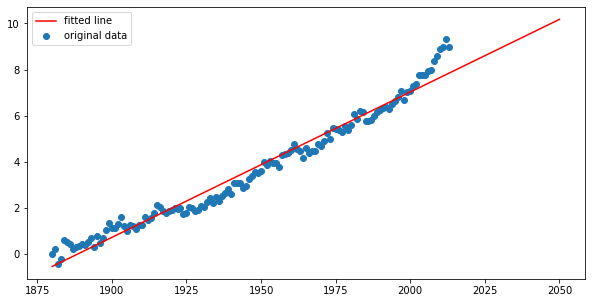

In [50]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(df['Year'],df['CSIRO Adjusted Sea Level'],label='original data')
plt.plot(x_pred,y_pred,'r',label="fitted line")
plt.legend()
plt.show()

Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset.

Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

In [51]:
res2 = linregress(df[df['Year']>=2000]['Year'],df[df['Year']>=2000]['CSIRO Adjusted Sea Level'])
x_pred2 = pd.Series(i for i in range(2000,2051))
y_pred2 = res2.slope*x_pred2 + res2.intercept

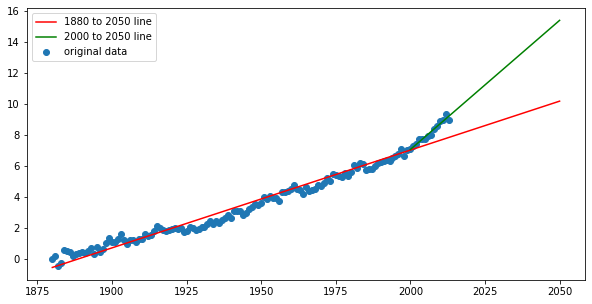

In [55]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(df['Year'],df['CSIRO Adjusted Sea Level'],label="original data")
plt.plot(x_pred,y_pred,'r',label="1880 to 2050 line")
plt.plot(x_pred2,y_pred2,'g',label="2000 to 2050 line")
plt.legend()
plt.show()